# Classification Review - Multiclass Classification
### Multiclass LR, LDA, QDA, KNN

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [38]:
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [39]:
from sklearn.datasets import make_blobs, make_classification

In [150]:
X,y = make_classification(n_samples = 4000, n_features=15, n_informative=2,
                          n_clusters_per_class  = 1, random_state = 97, class_sep = 1, 
                          flip_y = 0.05, n_classes = 2) 

In [151]:
print("Unique classes in response: %s" % np.unique(np.array(y)))

Unique classes in response: [0 1]


In [152]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (4000, 15), y has shape: (4000,)


In [153]:
# Logistic
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [154]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (3200, 15), Test feature set shape: (800, 15) 
Train set labels shape: (3200,), Test set labels shape: (800,) 


In [155]:
c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results_lr = []

for val in c_param_list:
    log_reg = LogisticRegression(penalty = 'l2', max_iter=100000, C = val, solver = 'lbfgs')
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_lr.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.0001, CV Score Avg: 0.8971874999999999 
C val: 0.001, CV Score Avg: 0.9106249999999999 
C val: 0.01, CV Score Avg: 0.9259374999999999 
C val: 0.1, CV Score Avg: 0.9284375 
C val: 1, CV Score Avg: 0.9290625 
C val: 10, CV Score Avg: 0.9290625 
C val: 100, CV Score Avg: 0.9290625 
C val: 1000, CV Score Avg: 0.9290625 


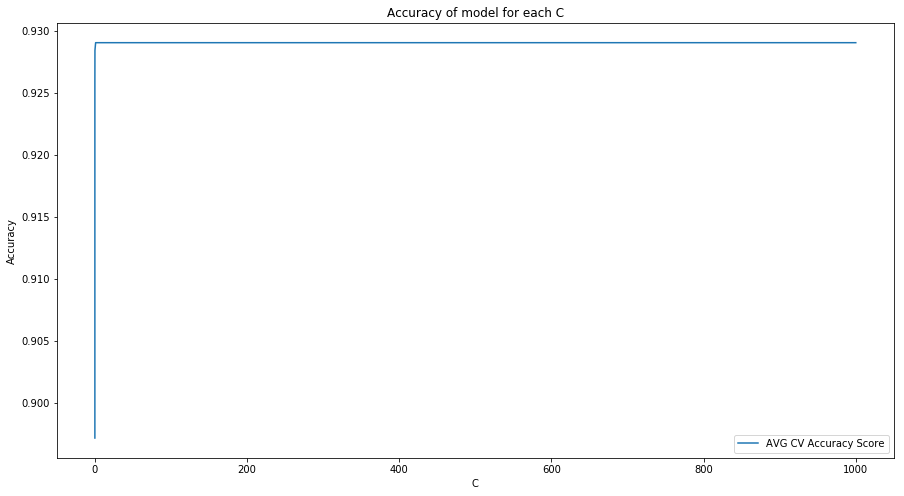

In [156]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results_lr), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [158]:
avg_cv_scores = np.mean(np.array(score_results_lr), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index])

Optimal Value of C: 1


In [176]:
log_reg_optimal = LogisticRegression(penalty = 'l2', max_iter=100000, C = c_param_list[max_avg_accuracy_index], solver = 'lbfgs')
opt_mod_log_reg = log_reg_optimal.fit(X_Train,y_train)

y_pred_lr = opt_mod_log_reg.predict(X)
pred_prob_lr = opt_mod_log_reg.predict_proba(X)

In [177]:
print(confusion_matrix(y, y_pred_lr))

[[1779  216]
 [  59 1946]]


In [178]:
print(classification_report(y, y_pred_lr, digits = 6))

              precision    recall  f1-score   support

           0   0.967900  0.891729  0.928255      1995
           1   0.900093  0.970574  0.934005      2005

    accuracy                       0.931250      4000
   macro avg   0.933996  0.931151  0.931130      4000
weighted avg   0.933911  0.931250  0.931137      4000



In [179]:
fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y, pred_prob_lr[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))


p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y, pred_prob_lr[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))


ROC: AUC Class 0:  0.9516531978324866
ROC: AUC Class 1:  0.9516531978324865
Precision-Recall: AUC Class 1: 0.9474313204222059
Precision-Recall: AUC Class 1: 0.90919940289758


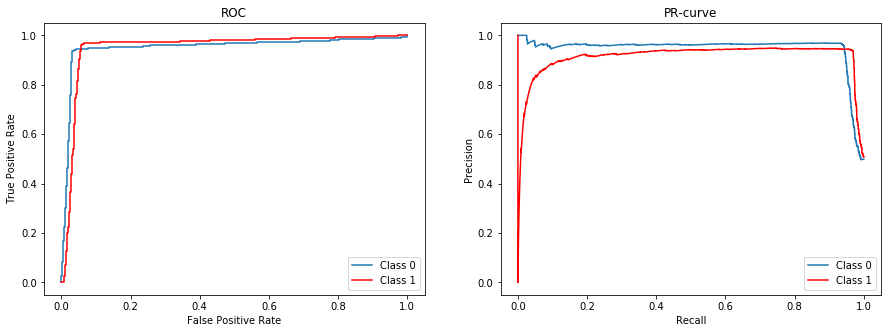

In [180]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

In [181]:
# Training
y_train_pred_lr = opt_mod_log_reg.predict(X_Train)
pred_prob_lr_train = opt_mod_log_reg.predict_proba(X_Train)

fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y_train, pred_prob_lr_train[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y_train, pred_prob_lr_train[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))


p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y_train, pred_prob_lr_train[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y_train, pred_prob_lr_train[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))


ROC: AUC Class 0:  0.952092500903329
ROC: AUC Class 1:  0.9520925009033292
Precision-Recall: AUC Class 1: 0.9451399777772106
Precision-Recall: AUC Class 1: 0.9161494031002777


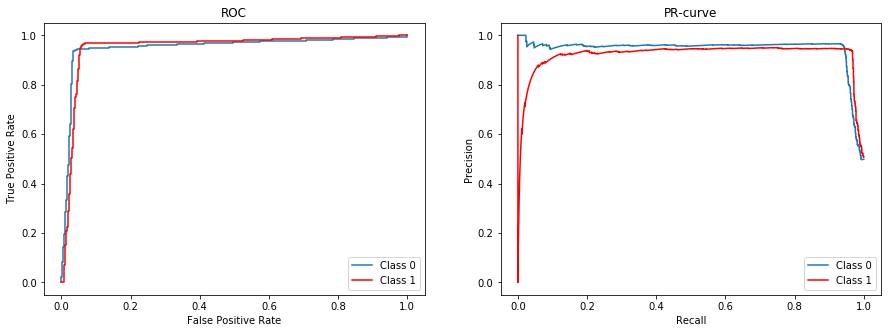

In [182]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

In [183]:
print(classification_report(y_train, y_train_pred_lr, digits = 6))

              precision    recall  f1-score   support

           0   0.965400  0.892163  0.927338      1595
           1   0.900348  0.968224  0.933053      1605

    accuracy                       0.930312      3200
   macro avg   0.932874  0.930194  0.930196      3200
weighted avg   0.932772  0.930312  0.930204      3200



In [187]:
# Test
y_test_pred_lr = opt_mod_log_reg.predict(X_test)
pred_prob_lr_test = opt_mod_log_reg.predict_proba(X_test)

fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y_test, pred_prob_lr_test[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y_test, pred_prob_lr_test[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))


p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y_test, pred_prob_lr_test[:,0], pos_label = 0)
print("Precision-Recall: AUC Class :", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y_test, pred_prob_lr_test[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))


ROC: AUC Class 0:  0.94955625
ROC: AUC Class 1:  0.94955625
Precision-Recall: AUC Class : 0.9551412667734891
Precision-Recall: AUC Class 1: 0.8829398827001378


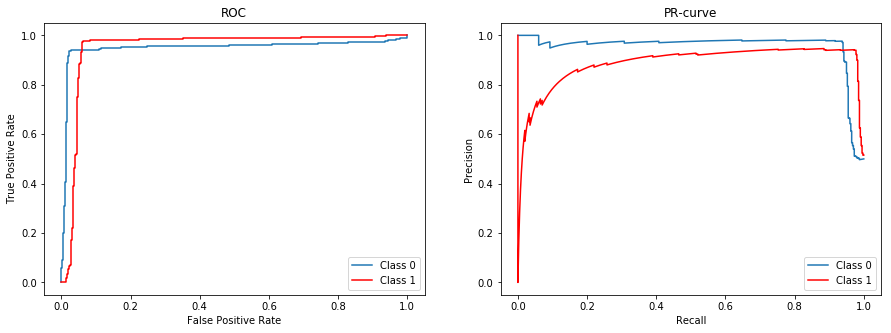

In [188]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

In [ ]:
# as we can see from plot ROc crves are equally good for both class 1 and class 2, AUC-s are equal for Class 1 and class 2
# for Class 0 PR curve looks much better than for Clas 1

In [189]:
print(classification_report(y_test, y_test_pred_lr, digits = 6))

              precision    recall  f1-score   support

           0   0.978022  0.890000  0.931937       400
           1   0.899083  0.980000  0.937799       400

    accuracy                       0.935000       800
   macro avg   0.938552  0.935000  0.934868       800
weighted avg   0.938552  0.935000  0.934868       800



In [ ]:
#acc on test set: 0.935000 , acc on train:  0.930312

In [190]:
#Problem 2


X2,y2 = make_blobs(n_samples = [5000, 300, 150], n_features = 10, random_state = 97, cluster_std = [6, 3, 5])

In [196]:
linear_discriminant_analysis = LinearDiscriminantAnalysis()
mod_lda = linear_discriminant_analysis.fit(X2,y2)
linear_discriminant_analysis.fit(X2,y2)

y2_pred_lda = mod_lda.predict(X2)
pred_prob_lda = mod_lda.predict_proba(X2)

In [197]:
print(confusion_matrix(y2, y2_pred_lda))

[[4987    5    8]
 [   0  300    0]
 [   5   11  134]]


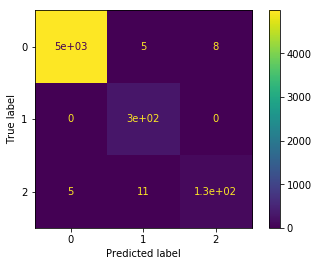

<Figure size 1080x360 with 0 Axes>

In [198]:
plot_confusion_matrix(linear_discriminant_analysis, X2, y2, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [199]:
print(classification_report(y2, y2_pred_lda, digits = 6))

              precision    recall  f1-score   support

           0   0.998998  0.997400  0.998199      5000
           1   0.949367  1.000000  0.974026       300
           2   0.943662  0.893333  0.917808       150

    accuracy                       0.994679      5450
   macro avg   0.964009  0.963578  0.963344      5450
weighted avg   0.994743  0.994679  0.994655      5450



In [ ]:
# accuricy for LDA:0.994679

In [200]:
fpr0_lda, tpr0_lda, thresholds0_lda = roc_curve(y2, pred_prob_lda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lda, tpr0_lda))

fpr1_lda, tpr1_lda, thresholds1_lda = roc_curve(y2, pred_prob_lda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lda, tpr1_lda))

fpr2_lda, tpr2_lda, thresholds2_lda = roc_curve(y2, pred_prob_lda[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_lda, tpr2_lda))

p0_lda, r0_lda, thresholds0_lda = precision_recall_curve(y2, pred_prob_lda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lda, p0_lda))

p1_lda, r1_lda, thresholds1_lda = precision_recall_curve(y2, pred_prob_lda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lda, p1_lda))

p2_lda, r2_lda, thresholds2_lda = precision_recall_curve(y2, pred_prob_lda[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_lda, p2_lda))

ROC: AUC Class 0:  0.9998493333333334
ROC: AUC Class 1:  0.9999980582524272
ROC: AUC Class 2:  0.9993157232704402
Precision-Recall: AUC Class 1: 0.9999864184005894
Precision-Recall: AUC Class 1: 0.9999667585837211
Precision-Recall: AUC Class 2: 0.9784102972861509


## Quadratic Discriminant Analysis

In [201]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis()
mod_qda = quadratic_discriminant_analysis.fit(X2,y2)
quadratic_discriminant_analysis.fit(X2,y2)

y2_pred_qda = mod_qda.predict(X2)
pred_prob_qda = mod_qda.predict_proba(X2)

In [202]:
print(confusion_matrix(y2, y2_pred_qda))

[[4995    0    5]
 [   0  300    0]
 [   7    1  142]]


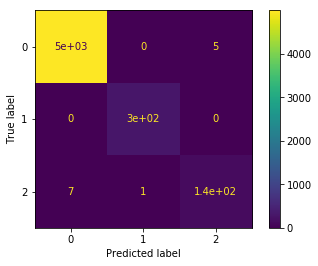

<Figure size 1080x360 with 0 Axes>

In [203]:
plot_confusion_matrix(quadratic_discriminant_analysis, X2, y2, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [207]:
print(classification_report(y2, y2_pred_lda, digits = 6))

              precision    recall  f1-score   support

           0   0.998998  0.997400  0.998199      5000
           1   0.949367  1.000000  0.974026       300
           2   0.943662  0.893333  0.917808       150

    accuracy                       0.994679      5450
   macro avg   0.964009  0.963578  0.963344      5450
weighted avg   0.994743  0.994679  0.994655      5450



In [204]:
print(classification_report(y2, y2_pred_qda, digits = 6))

              precision    recall  f1-score   support

           0   0.998601  0.999000  0.998800      5000
           1   0.996678  1.000000  0.998336       300
           2   0.965986  0.946667  0.956229       150

    accuracy                       0.997615      5450
   macro avg   0.987088  0.981889  0.984455      5450
weighted avg   0.997597  0.997615  0.997603      5450



In [208]:
# from reports we can see that 3 classes aree predicted better in QDA

# and we can see that in both models Class 0 is predicted with higer accuricy
# but there are 5000 ssemples of class 1  => so this probably due to imbalance problem

In [209]:
#acc QDA: 0.997615

In [205]:
fpr0_qda, tpr0_qda, thresholds0_qda = roc_curve(y2, pred_prob_qda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_qda,tpr0_qda))

fpr1_qda, tpr1_qda, thresholds1_qda = roc_curve(y2, pred_prob_qda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_qda,tpr1_qda))

fpr2_qda, tpr2_qda, thresholds1_qda = roc_curve(y2, pred_prob_qda[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_qda,tpr2_qda))

p0_qda, r0_qda, thresholds0_qda = precision_recall_curve(y2, pred_prob_qda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_qda,p0_qda))

p1_qda, r1_qda, thresholds1_qda = precision_recall_curve(y2, pred_prob_qda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_qda,p1_qda))

p2_qda, r2_qda, thresholds2_qda = precision_recall_curve(y2, pred_prob_qda[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_qda,p2_qda))

ROC: AUC Class 0:  0.9998862222222222
ROC: AUC Class 1:  0.9999987055016181
ROC: AUC Class 2:  0.9995962264150944
Precision-Recall: AUC Class 1: 0.9999897504168616
Precision-Recall: AUC Class 1: 0.9999777776543197
Precision-Recall: AUC Class 2: 0.9878323555027394


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


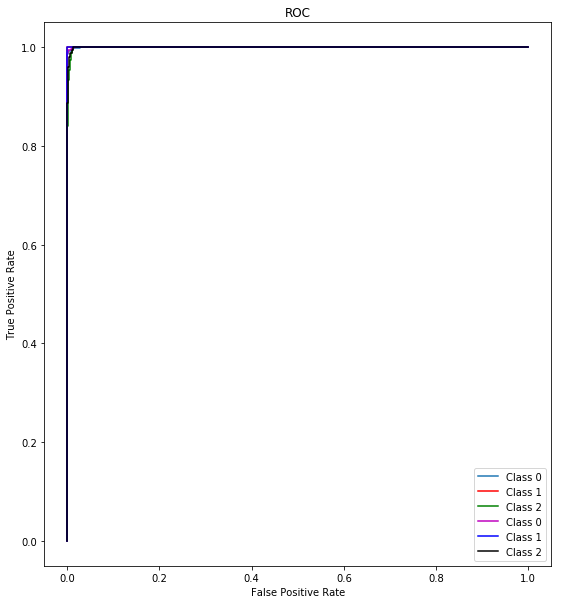

In [105]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lda, tpr2_lda, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()



plt.subplot(1,2,1)
plt.plot(fpr0_qda, tpr0_qda, "-", color = 'm', label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'b', label = "Class 1")
plt.plot(fpr2_qda, tpr2_qda, "-", color = 'k', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [106]:
# as it is hard to see minor differences we will watch on different plots

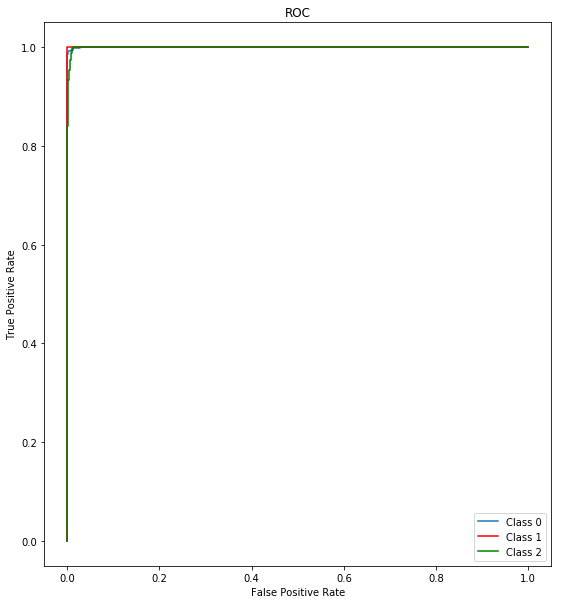

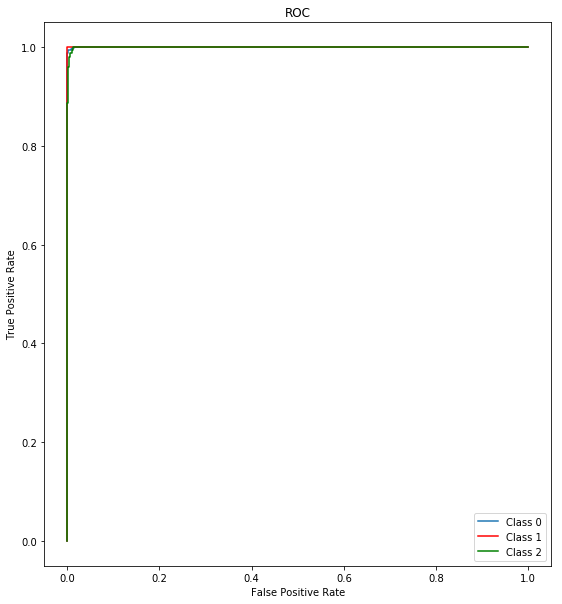

In [107]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lda, tpr2_lda, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(fpr0_qda, tpr0_qda, "-", label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_qda, tpr2_qda, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [108]:
#from the plots we can see that thet ROC curve is perfect for Class 1 in both methods; AUC is nearly 1 
# Its nearly perfect for Class 0 and 2, just for QDA it is mi puchur better.

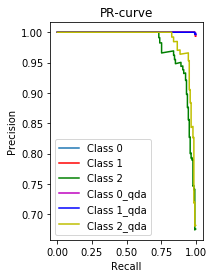

In [109]:
plt.subplot(1,2,2)
plt.plot(r0_lda, p0_lda, "-", label = "Class 0")
plt.plot(r1_lda, p1_lda, "-", color = 'r', label = "Class 1")
plt.plot(r2_lda, p2_lda, "-", color = 'g', label = "Class 2")
plt.legend()
# accuricy for LDA:0.994679 < acc QDA: 0.997615

plt.subplot(1,2,2)
plt.plot(r0_qda, p0_qda, "-", color = 'm', label = "Class 0_qda")
plt.plot(r1_qda, p1_qda, "-", color = 'b', label = "Class 1_qda")
plt.plot(r2_qda, p2_qda, "-", color = 'y', label = "Class 2_qda")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()


In [206]:
# we can see that for Class2 QDA preforms better resultes, the other 2 are nearly the same

# accuricy for LDA:0.994679 < acc QDA: 0.997615

# so we can conclude that QDA preformes better ressultes



## k-NN

In [110]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (3200, 15), Test feature set shape: (800, 15) 
Train set labels shape: (3200,), Test set labels shape: (800,) 


In [141]:
k_value_list = np.arange(1,26)
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.8931250000000001 
k val: 2, CV Score Avg: 0.8828125 
k val: 3, CV Score Avg: 0.9215625 
k val: 4, CV Score Avg: 0.921875 
k val: 5, CV Score Avg: 0.9290625 
k val: 6, CV Score Avg: 0.9321875000000001 
k val: 7, CV Score Avg: 0.9296875 
k val: 8, CV Score Avg: 0.9325000000000001 
k val: 9, CV Score Avg: 0.9299999999999999 
k val: 10, CV Score Avg: 0.9318750000000001 
k val: 11, CV Score Avg: 0.9275 
k val: 12, CV Score Avg: 0.930625 
k val: 13, CV Score Avg: 0.9265624999999998 
k val: 14, CV Score Avg: 0.9284374999999999 
k val: 15, CV Score Avg: 0.9259374999999999 
k val: 16, CV Score Avg: 0.9274999999999999 
k val: 17, CV Score Avg: 0.9256249999999999 
k val: 18, CV Score Avg: 0.9284374999999999 
k val: 19, CV Score Avg: 0.9253124999999999 
k val: 20, CV Score Avg: 0.9262499999999999 
k val: 21, CV Score Avg: 0.9256249999999999 
k val: 22, CV Score Avg: 0.9271874999999999 
k val: 23, CV Score Avg: 0.9259374999999999 
k val: 24, CV Score Avg: 0.9265625 
k val:

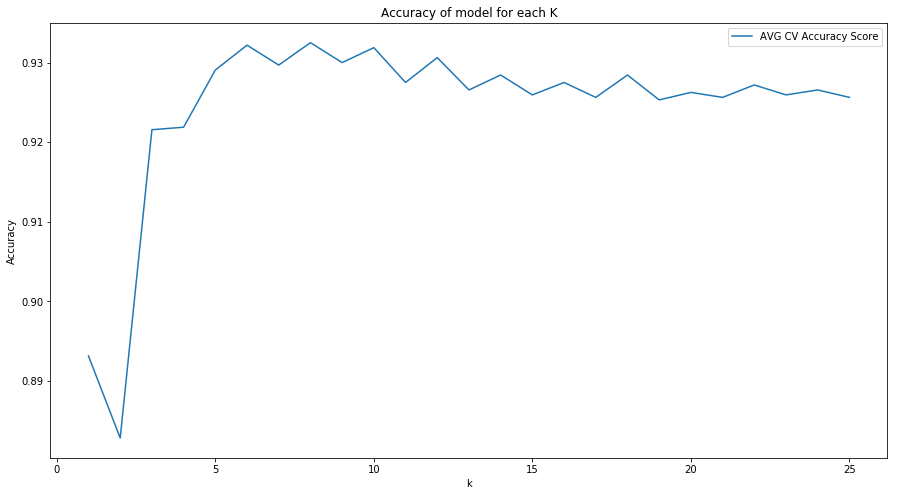

In [142]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [143]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 
print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 
# max accuricy: 0.9325000000000001 ; Optimal Val of k: 8

Optimal Value of k: 8


In [144]:
knn_optimal = KNeighborsClassifier(n_neighbors=8)
opt_mod_knn = knn_optimal.fit(X_Train,y_train)

y_test_pred_knn = opt_mod_knn.predict(X_test)
pred_prob_knn_test = opt_mod_knn.predict_proba(X_test)

In [145]:
print(confusion_matrix(y, y_pred_knn))

[[1820  175]
 [  66 1939]]


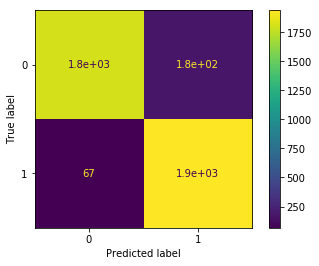

<Figure size 1080x360 with 0 Axes>

In [146]:
plot_confusion_matrix(knn_optimal, X, y, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [147]:
print(classification_report(y_test, y_test_pred_knn, digits = 6))

              precision    recall  f1-score   support

           0   0.965147  0.900000  0.931436       400
           1   0.906323  0.967500  0.935913       400

    accuracy                       0.933750       800
   macro avg   0.935735  0.933750  0.933674       800
weighted avg   0.935735  0.933750  0.933674       800



In [ ]:
# the accuricy for test set: 0.933 and for training set: 0.932

In [148]:
fpr0_knn, tpr0_knn, thresholds0_knn = roc_curve(y, pred_prob_knn[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_knn, tpr0_knn))

fpr1_knn, tpr1_knn, thresholds1_knn = roc_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_knn, tpr1_knn))


p0_knn, r0_knn, thresholds0_knn = precision_recall_curve(y, pred_prob_knn[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_knn, p0_knn))

p1_knn, r1_knn, thresholds1_knn = precision_recall_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_knn, p1_knn))


ROC: AUC Class 0:  0.9827497671860449
ROC: AUC Class 1:  0.9827497671860449
Precision-Recall: AUC Class 0: 0.9848246463187867
Precision-Recall: AUC Class 1: 0.9834671342854272


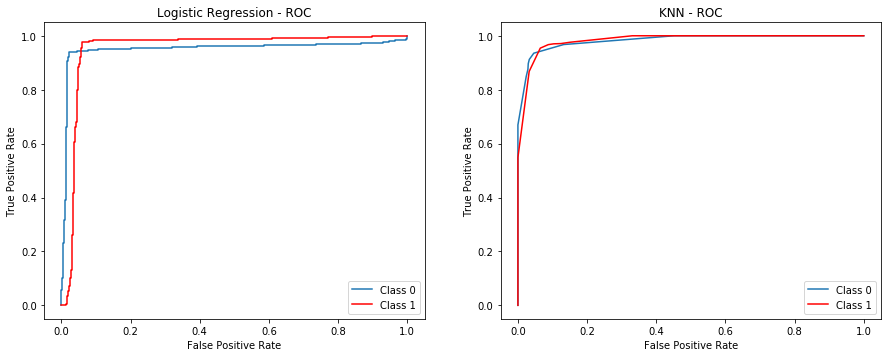

In [134]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("Logistic Regression - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()


plt.subplot(2,2,2)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.title("KNN - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

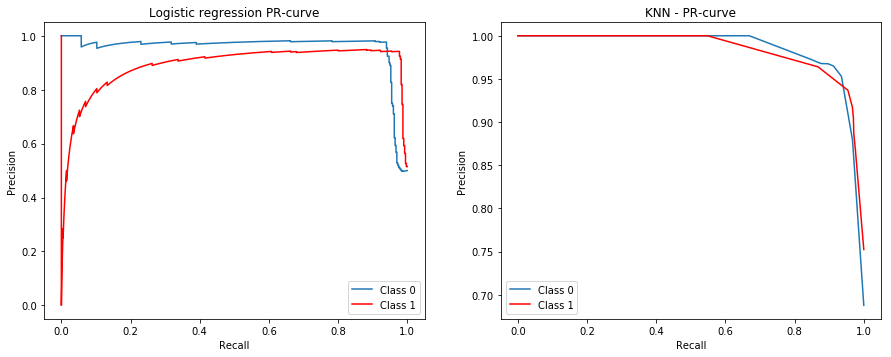

In [135]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic regression PR-curve")

plt.subplot(2,2,2)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN - PR-curve")

plt.show()

In [ ]:
# Logs-s ROC curve is much better
#KNN-s PR curve is better

# Log preformes much better resultes

# KNN acccuricy for test set: 0.933750
# Log. accuricy for test set  0.935000